In [195]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale, minmax_scale, robust_scale
%matplotlib inline
import matplotlib
# 음수 표시
matplotlib.rc('axes', unicode_minus=False)
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 formula(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# Scale 변환->표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가함수
from statsmodels.tools.eval_measures import rmse

# 타이타닉호

In [290]:
matplotlib.rc('font', family = 'Malgun Gothic')

In [291]:
df_titanic = pd.read_csv("C:/Users/USER/Desktop/포스코 청년 아카데미_B4_김민경/데이터 분석1/분석자료/titanic.csv",encoding='euc-kr')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [292]:
# 데이터 속성 확인
df_titanic.info()

# cabin과 embarked에 결측치가 있을 것으로 예상된다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [293]:
df_titanic.shape

# 891 개의 행과 12개의 열이 있다.

(891, 12)

In [294]:
# 기술 통계량 확인
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [295]:
# 결측치 확인
df_titanic.isnull().head()

# cabin에 결측치가 보임

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [296]:
# 결측치 합계
df_titanic.isnull().sum()

#cabin에 687개의 결측치와 embarked에 2개의 결측치가 있다.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

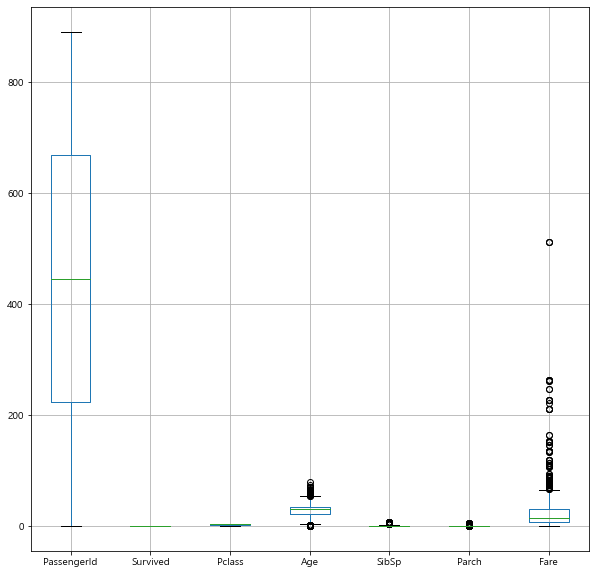

In [297]:
# 이상치 확인하기
df_titanic.boxplot(figsize = (10,10))

# age, sibsp, parch, fare에 이상치가 보인다.

Carbin과 Embarked 의 결측치에 최빈값을 넣어줍니다

In [298]:
most = df_titanic['Cabin'].value_counts(dropna=True).idxmax()
print(most)

C23 C25 C27


In [299]:
most_Em = df_titanic['Embarked'].value_counts(dropna=True).idxmax()
print(most_Em)

S


In [300]:
# 결측치 채워주기 
df_titanic['Cabin'].fillna(most, inplace = True)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C23 C25 C27,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C23 C25 C27,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C23 C25 C27,S


In [301]:
# 결측치 채워주기 
df_titanic['Embarked'].fillna(most_Em, inplace = True)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C23 C25 C27,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C23 C25 C27,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C23 C25 C27,S


In [302]:
# 결측치가 없음을 확인
df_titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [303]:
df_titanic['Cabin'] = df_titanic['Cabin'].str.get(i=0)
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,C,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,C,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C


In [304]:
df_titanic['Family'] = df_titanic['Parch'] + df_titanic['SibSp']
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,C,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,C,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C,0


In [305]:
llist = [0, 14, 28, 45, 56,200]  # 나이 구간 설정 리스트 

In [306]:
llist_label = ['child', 'Young', 'Middle','Prime', 'Old','end']  # 값으로 들어갈 리스트

In [307]:
df_titanic['age'] = pd.cut(df_titanic['Age'], llist, labels= llist_label[:-1])

# cut() 함수는 배열 요소를 다른 bin으로 분리하는데 사용

In [308]:
df_titanic.drop('Age', axis = 1, inplace = True)  # 기존의 Age 열 삭제

In [309]:
liist = [0, 50, 100, 150, 200, 1000]
liist_label=[0, 1, 2, 3, 4,5]

In [310]:
df_titanic['fare'] = pd.cut(df_titanic['Fare'],liist, labels= liist_label[:-1])
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,age,fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,C,S,1,Young,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,C,1,Middle,1
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,C,S,0,Young,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C,S,1,Middle,1
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,C,S,0,Middle,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,C,S,0,Young,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,B,S,0,Young,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,C,S,3,Middle,0
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C,C,0,Young,0


In [311]:
df_titanic.drop('Fare', axis = 1, inplace = True)  # 기존의 Fare 열 삭제

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked,Family,age,fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,C,S,1,Young,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,C,C,1,Middle,1
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,C,S,0,Young,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,C,S,1,Middle,1
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,C,S,0,Middle,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,C,S,0,Young,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,B,S,0,Young,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,C,S,3,Middle,0
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,C,C,0,Young,0


<AxesSubplot:>

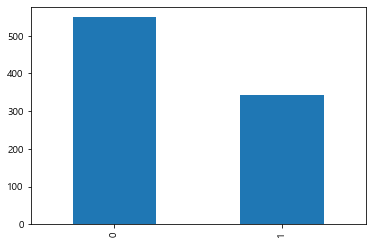

In [313]:
df_count = df_titanic['Survived'].value_counts()
df_count.plot.bar()
# 0 사망 1 생존
# 사망자의 빈도수가 더 높다

<AxesSubplot:>

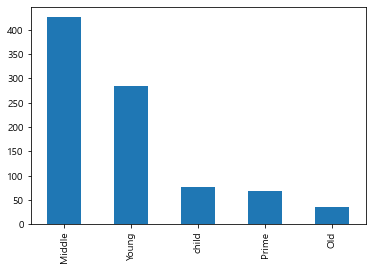

In [323]:
df_count = df_titanic['age'].value_counts()
df_count.plot.bar()

# 29세 이상 45세 이하가 가장 많다
# 다음으로는 15살 이상 28세이하가 많다

<AxesSubplot:xlabel='Pclass,Survived'>

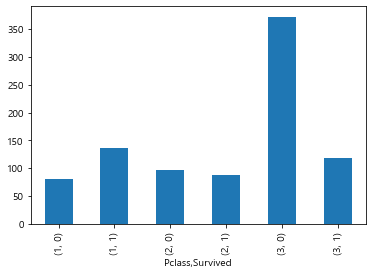

In [328]:
df_count = df_titanic.groupby(['Pclass','Survived']).size()
df_count.plot.bar()

<AxesSubplot:xlabel='Survived,age'>

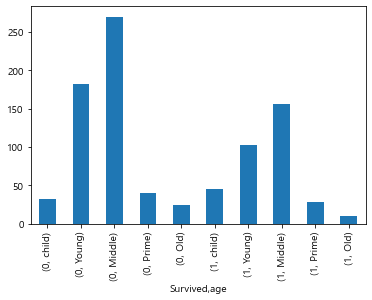

In [326]:
df_count = df_titanic.groupby(['Survived','age']).size()
df_count.plot.bar()

# 사망자 수 중에서 29세 이상 45세 이하가 가장 많다
# 생존자수 중에서도29세 이상 45세 이하가 가장많다

<AxesSubplot:ylabel='None'>

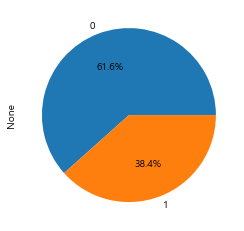

In [316]:
df_count = df_titanic.groupby(['Survived']).size()r
df_count.plot.pie(y = 'Survived', autopct = '%.1f%%')

# 사망률이 61.6% 생존률 38.4%

<AxesSubplot:ylabel='None'>

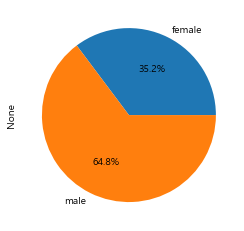

In [319]:
df_count = df_titanic.groupby(['Sex']).size()
df_count.plot.pie(y = 'Survived', autopct = '%.1f%%')

# 여성 35.2%  남성 64.8%

<AxesSubplot:ylabel='None'>

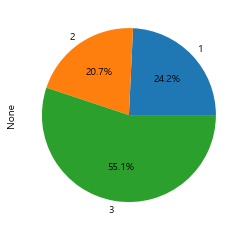

In [320]:
df_count = df_titanic.groupby(['Pclass']).size()
df_count.plot.pie(y = 'Survived', autopct = '%.1f%%')

# 1등급 24.2%   2등급 20.7%   3등급 55.1%

<AxesSubplot:ylabel='None'>

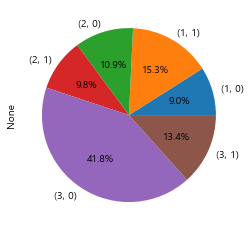

In [327]:
df_count = df_titanic.groupby(['Pclass','Survived']).size()
df_count.plot.pie(y = 'Survived', autopct = '%.1f%%')

# 클래스가 낮을수록 사망률이 높다


<AxesSubplot:ylabel='None'>

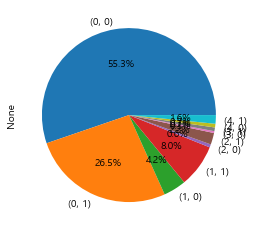

In [329]:
df_count = df_titanic.groupby(['fare','Survived']).size()
df_count.plot.pie(y = 'Survived', autopct = '%.1f%%')
# 요금이 낮을수록 사망률이 높다

<AxesSubplot:ylabel='None'>

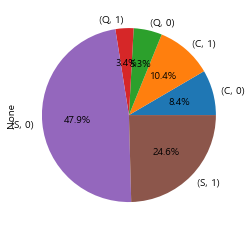

In [331]:
df_count = df_titanic.groupby(['Embarked','Survived']).size()
df_count.plot.pie(y = 'Survived', autopct = '%.1f%%')
# 탑승한 곳이 s c q 순으로 사망률이 높다

<AxesSubplot:ylabel='None'>

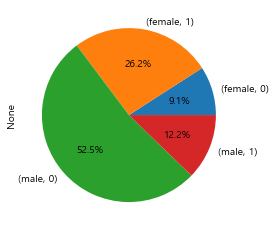

In [322]:
df_count = df_titanic.groupby(['Sex','Survived']).size()
df_count.plot.pie(y = 'Survived', autopct = '%.1f%%')

# 남성의 사망율이 가장 높다. 여성의 사망율이 제일 낫다

좌석의 등급이 높을수록 생존률이 높고 좌석의 등급이 낮을수록 사망률이 높다

티켓의 요금이 낮을수록 사망률이 높다

탑승한 곳이 s , c, q 순으로 사망률이 높다

# 회귀분석 - 체질검사

In [360]:
df_raw = pd.read_csv("C:/Users/USER/Desktop/포스코 청년 아카데미_B4_김민경/데이터 분석1/분석자료/체질검사.CSV")
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [361]:
data = df_raw['WEIGHT']*0.45  # 파운드를 키로수로 변경

In [362]:
data2 = (df_raw['HEIGHT'] *2.54) *0.01  # 인치를 센치미터로 변경후 다시 미터로 변경

In [363]:
data3 = (data / data2 **2 ) # BMI 구하는 식

In [364]:
df_raw['BMI'] =data3  # BMI추가

In [365]:
df_raw

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.523870
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,23.082595
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,26.422478
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,23.838617
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,37.293165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,31.9,74,207.50,70.00,40.8,112.4,108.5,107.1,59.3,42.2,24.6,33.7,30.0,20.9,29.537049
248,23.6,43,170.75,67.50,37.4,103.7,89.7,94.2,58.5,39.0,24.1,33.8,28.8,18.8,26.139558
249,20.9,35,162.75,66.00,36.4,99.1,92.8,99.2,63.1,38.7,21.7,31.1,26.4,16.9,26.060228
250,17.0,56,167.75,68.50,37.4,98.6,93.0,97.0,55.4,38.8,23.2,32.4,29.7,19.0,24.935981


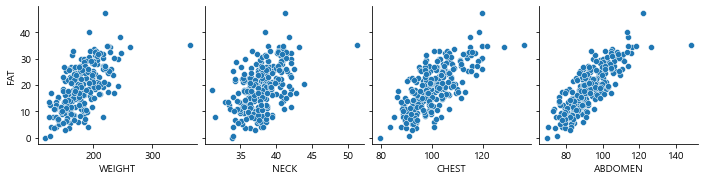

In [366]:
# 산점도 행렬:목표변수와 설명변수 지정. kind ="scatter"| "reg" 
sns.pairplot(df_raw, y_vars="FAT", x_vars=["WEIGHT", "NECK", "CHEST", "ABDOMEN"])

# 산점도에서 이상치가 보인다.
# 목표변수와 설명변수간의 선형관계가 보인다.

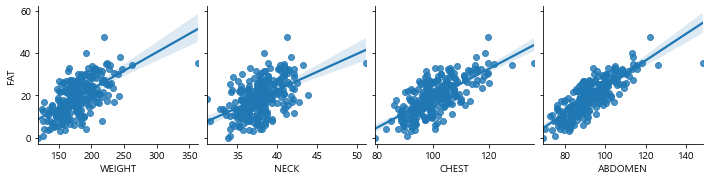

In [367]:
# 회귀 적합선 추가 : kind ="reg" 
sns.pairplot(df_raw, y_vars="FAT", x_vars=["WEIGHT", "NECK", "CHEST", "ABDOMEN"], kind = "reg")

# 목표변수와 설명변수간의 선형관계가 보인다.

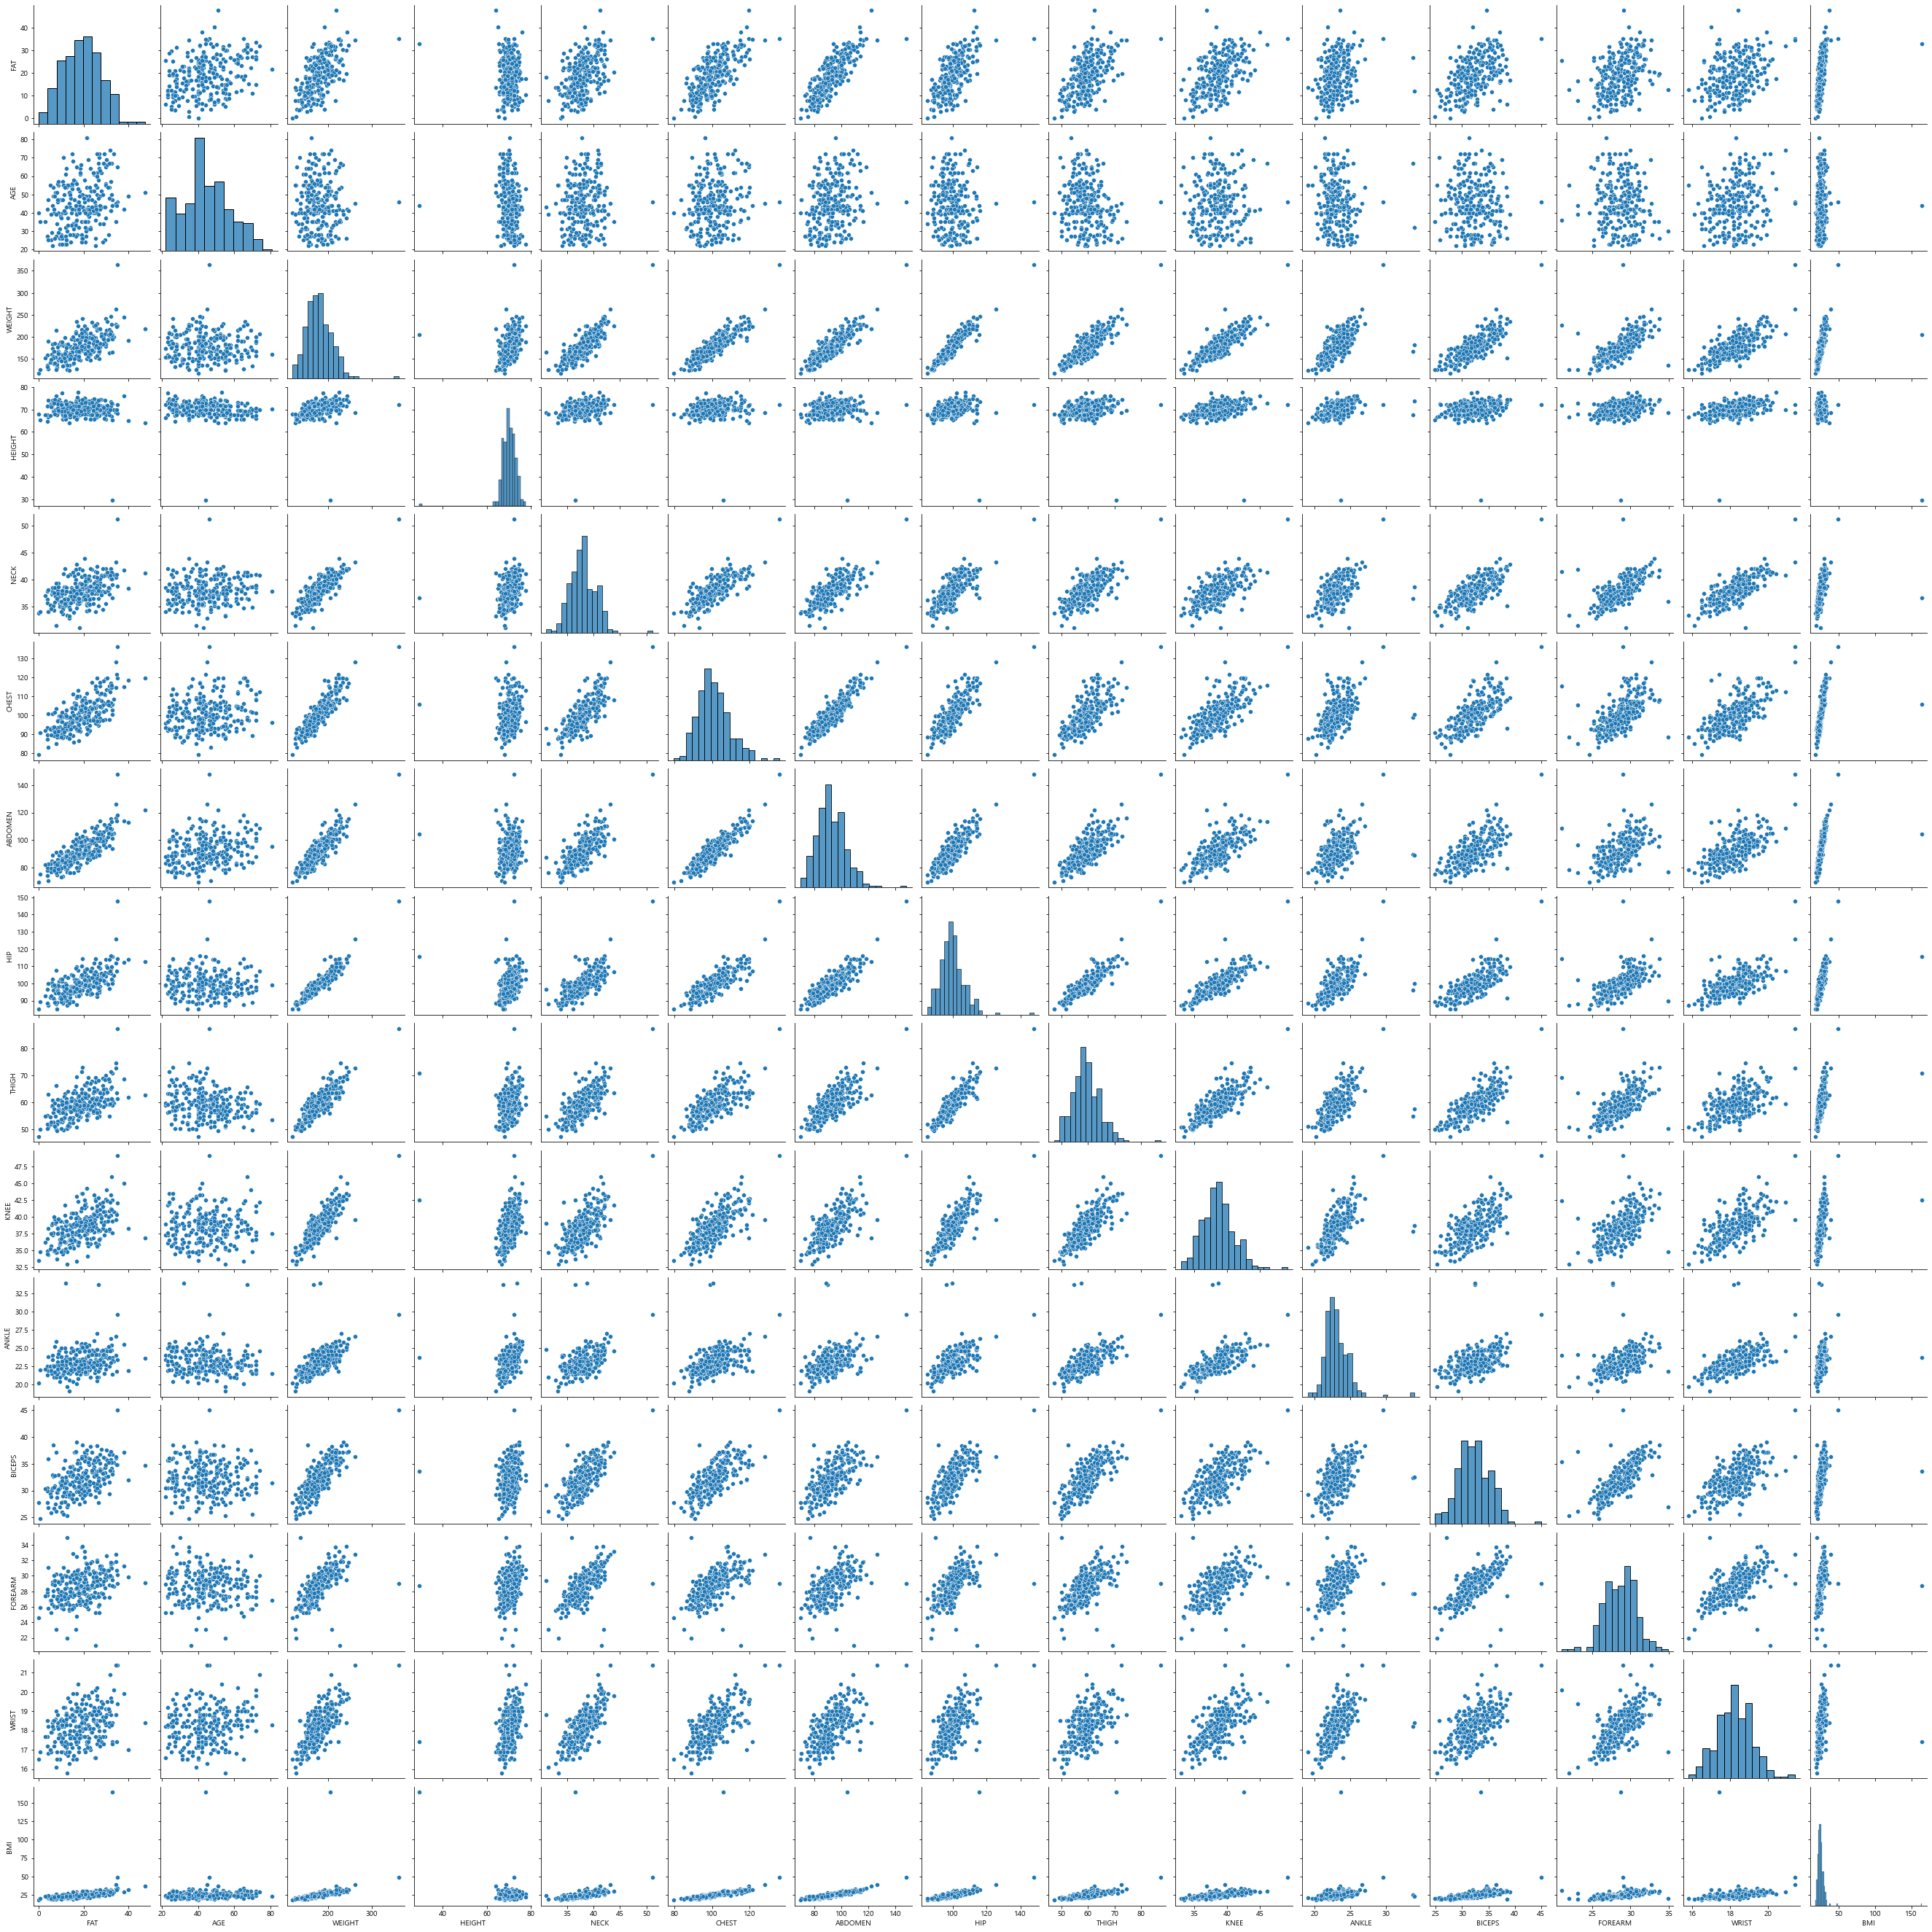

In [368]:
# 산점도 행렬:전체 숫자형 변수
sns.pairplot(df_raw)

#선형관계들이 보인다.

In [369]:
# 상관관계 분석
df_raw.corr().round(3)

# 목표변수 FAT와 CHEST, ABDOMEN, HIP가 선형관계가 확인된다.
#설명변수간 상관관계도 보인다.
# 다중공선성 확인이 필요함을 보인다.

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
FAT,1.000,0.291,0.612,-0.089,0.491,0.703,0.813,0.625,0.560,0.509,0.266,0.493,0.361,0.347,0.371
AGE,0.291,1.000,-0.013,-0.172,0.114,0.176,0.230,-0.050,-0.200,0.018,-0.105,-0.041,-0.085,0.214,0.040
WEIGHT,0.612,-0.013,1.000,0.308,0.831,0.894,0.888,0.941,0.869,0.853,0.614,0.800,0.630,0.730,0.391
HEIGHT,-0.089,-0.172,0.308,1.000,0.254,0.135,0.088,0.170,0.148,0.286,0.265,0.208,0.229,0.322,-0.638
NECK,0.491,0.114,0.831,0.254,1.000,0.785,0.754,0.735,0.696,0.672,0.478,0.731,0.624,0.745,0.266
CHEST,0.703,0.176,0.894,0.135,0.785,1.000,0.916,0.829,0.730,0.719,0.483,0.728,0.580,0.660,0.383
ABDOMEN,0.813,0.230,0.888,0.088,0.754,0.916,1.000,0.874,0.767,0.737,0.453,0.685,0.503,0.620,0.415
HIP,0.625,-0.050,0.941,0.170,0.735,0.829,0.874,1.000,0.896,0.823,0.558,0.739,0.545,0.630,0.462
THIGH,0.560,-0.200,0.869,0.148,0.696,0.730,0.767,0.896,1.000,0.799,0.540,0.761,0.567,0.559,0.433
KNEE,0.509,0.018,0.853,0.286,0.672,0.719,0.737,0.823,0.799,1.000,0.612,0.679,0.556,0.665,0.364


In [370]:
# 선형 회귀 분석 
reg_model = smf.ols(formula = "FAT ~ AGE + WEIGHT + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH +KNEE + ANKLE + BICEPS + FOREARM + WRIST +BMI", data = df_raw)
reg_result = reg_model.fit()

print(reg_result.summary())


# Adj. R-squared 가 0.749 이다 즉, 모델 설명력이 74.9% 이다
# p-value 는 5.49e-63이므로 0.05보다 작으므로 대립가설을 채택하여 회귀모델로서 의미가 있다.
# 설명변수의 p값을 확인하면 CHEST,HEIGHT,KNEE,BMI가 많이 높게 나오는 것으로 보인다. p값은 낮을 수록 좋다. 
# 잔차의 정규성 Prob(Omnibus)은 0.118 이므로 0,05보다 크기 때문에 귀무가설을 채택하여
# 정규성을 띈다고 말할 수 있다.
# Durbin-Watson은 잔차의 독립성을 확인할 수 있다. 2.113 이므로 독립적이라고 말할 수 있다.

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     50.56
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           5.49e-63
Time:                        00:43:27   Log-Likelihood:                -718.19
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     237   BIC:                             1519.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -24.2460     24.500     -0.990      0.3

In [372]:
# 설명변수간의 다중공선성 확인 : 설명변수 데이터 생성 및 상수항 추가
df_raw_x = df_raw.drop("FAT", axis = 1)
# statsmodels의 상수항 추가 함수 적용
df_raw_x_const = add_constant(df_raw_x) 
# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_raw_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_raw_x_const.values, i) for i in range(df_raw_x_const.shape[1])]
# VIF 정렬
df_vif.sort_values("VIF", inplace = True)
df_vif.round(3)

# WEIGHT,HIP,ABDOMEN,CHEST 의 vif가 10 이상이다. 다중 공선성이 존재한다.
# 변수는 하나씩 차례대로 삭제해야하므로 제일 큰 WEIGHT를 삭제하도록한다.

,variable,VIF
10,ANKLE,1.922
12,FOREARM,2.196
1,AGE,2.251
13,WRIST,3.378
11,BICEPS,3.674
4,NECK,4.456
9,KNEE,4.815
14,BMI,7.432
8,THIGH,8.010
3,HEIGHT,9.146


In [373]:
# 다중공선성 높은 변수인 WEIGHT 제거 후 공선성 재확인
df_raw_x = df_raw.drop(["FAT","WEIGHT"], axis = 1)
# statsmodels의 상수항 추가 함수 적용
df_raw_x_const = add_constant(df_raw_x) 
# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_raw_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_raw_x_const.values, i) for i in range(df_raw_x_const.shape[1])]
# VIF 정렬
df_vif.sort_values("VIF", inplace = True)
df_vif.round(3)

# HIP,ABDOMEN의 vif가 10 이상이지만 다시 회귀분석을 해보겠다.

,variable,VIF
9,ANKLE,1.847
11,FOREARM,2.196
1,AGE,2.196
12,WRIST,3.327
10,BICEPS,3.507
3,NECK,3.962
2,HEIGHT,4.665
13,BMI,4.729
8,KNEE,4.788
7,THIGH,7.837


In [374]:
# 선형회귀분석 : formula(y ~ X1 + X2 + ...) 이용.WEIGHT제거후 다시 진행
reg_model = smf.ols(formula = "FAT ~ AGE +  HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + \
                    KNEE + ANKLE + BICEPS + FOREARM + WRIST+BMI", data = df_raw)
# 적합
reg_result = reg_model.fit()

print(reg_result.summary())

# Adj. R-squared 가 0.733 이다 즉, 모델 설명력이 73.93% 이다. 전보다 조금 떨어졌다
# p-value 는 2.29e-63이므로 0.05보다 작으므로 대립가설을 채택하여 회귀모델로서 의미가 있다.
# 설명변수의 p값을 확인하면 CHEST,BMI,HEIGHT가 줄어들었음을 알 수 있다.
# 잔차의 정규성 Prob(Omnibus)은 0.261 이므로 0,05보다 크기 때문에 귀무가설을 채택하여
# 정규성을 띈다고 말할 수 있다.
# Durbin-Watson은 잔차의 독립성을 확인할 수 있다. 2.101 이므로 독립적이라고 말할 수 있다.

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     53.97
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           2.29e-63
Time:                        00:47:17   Log-Likelihood:                -719.42
No. Observations:                 252   AIC:                             1467.
Df Residuals:                     238   BIC:                             1516.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.6651      8.839      1.207      0.2

In [375]:
# RFE(recursive feature elimination) 함수 : 입력된 모델을 이용하여 변수중요도가 낮은 순으로 순차적으로 제거
df_raw_y = df_raw["FAT"]

model = LinearRegression()
# 전체 변수 중 5개의 변수가 남을 때까지 변수 선택
rfe = RFE(estimator = model, n_features_to_select = 5).fit(df_raw_x, df_raw_y)
# 선택된 변수
selected_cols = df_raw_x.columns[rfe.support_]
# 제거된 변수
removed_cols = df_raw_x.columns[~rfe.support_]

print("Selected Variables : {}".format(selected_cols)) 
print("Removed Variables : {}".format(removed_cols))

Selected Variables : Index(['NECK', 'ABDOMEN', 'HIP', 'FOREARM', 'WRIST'], dtype='object')
Removed Variables : Index(['AGE', 'HEIGHT', 'CHEST', 'THIGH', 'KNEE', 'ANKLE', 'BICEPS', 'BMI'], dtype='object')


In [376]:
# 회귀 모델 생성
rfe_reg_model = smf.ols(formula = "FAT ~ NECK + ABDOMEN + HIP + FOREARM + WRIST", data = df_raw)
# 적합
rfe_reg_result = rfe_reg_model.fit()

print(rfe_reg_result.summary())

# Adj. R-squared 가 0.726 이다 즉, 모델 설명력이 72.6% 이다. 전보다 조금 떨어졌다
# p-value 는  4.38e-68이므로 0.05보다 작으므로 대립가설을 채택하여 회귀모델로서 의미가 있다.
# 설명변수의 p값을 확인하면 모두 낮게 나온다
# 잔차의 정규성 Prob(Omnibus)은 0.158 이므로 0,05보다 크기 때문에 귀무가설을 채택하여
# 정규성을 띈다고 말할 수 있다.
# Durbin-Watson은 잔차의 독립성을 확인할 수 있다.  2.128이므로 독립적이라고 말할 수 있다

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           4.38e-68
Time:                        00:51:06   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7037      6.231      0.434      0.6

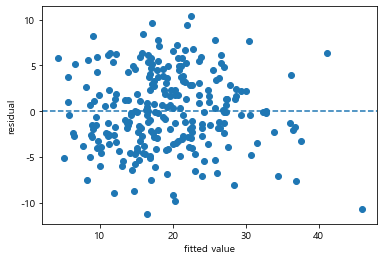

In [377]:
# 잔차 등분산성
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "--")

# 왼쪽이 잔차 밑에가 예측값 경향성이 없으면 등분산성이 있다고 할 수 있다. 
# 그림을 보면 등분산성이 있다고 할 수 있다.

<AxesSubplot:>

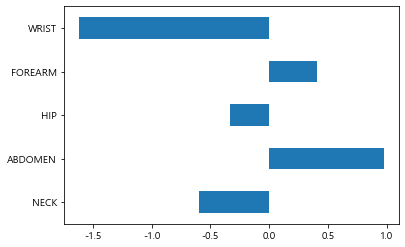

In [378]:
# 설명변수 중요도(표준화 적용 이전)  표준화 회귀계수 산출해야 함
df_reg_coef = pd.DataFrame({"Coef": rfe_reg_result.params.values[1:]}, index = selected_cols)
df_reg_coef.plot.barh(y = "Coef", legend = False)

# 선형회귀분석에서 변수의 중요도는 기울기의 크기 이다
# 이것은 스켈링 안했을 떄의 크기
# 변수의 중요도를 보면 손목의 두께가 얇을 수록 비만도가 낮다.
# 복부둘레가 커질수록 비마도가 높다

In [379]:
# 설명변수 표준화 적용  표준화 회귀계수 산출 목적
scaler = StandardScaler()
# Scale 변환대상 변수 : 일반적으로 설명변수
cols = df_raw_x.columns
# Scale 변환
np_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(np_scaled, columns = cols)
# 목표변수 추가
df_scaled["FAT"]= df_raw["FAT"]
reg_model_scaled = smf.ols(formula = "FAT ~ NECK + ABDOMEN + HIP + FOREARM + WRIST", data = df_scaled)
reg_result_scaled = reg_model_scaled.fit()

print(reg_result_scaled.summary())


                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           4.38e-68
Time:                        00:54:14   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.1508      0.276     69.362      0.0

<AxesSubplot:>

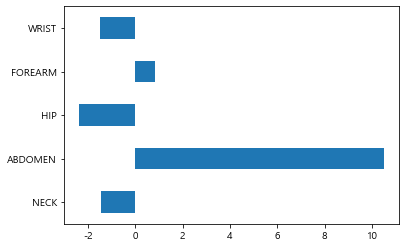

In [380]:
reg_result_scaled_coef = pd.DataFrame({"Coef": reg_result_scaled.params.values[1:]}, index = selected_cols)
reg_result_scaled_coef.plot.barh(y = "Coef", legend = False)

# 표준화 후 설명변수 중요도
# 회귀계수의 방향은 동일하지만 중요도의 크기가 변했다
# 복부 둘레의 중요도가 커졌고 손목의 중요도는 줄어들었다.

 y^ = 19.1508 -1.4585*NECK +10.4849 *ABDOMEN -2.3709 *HIP + 0.8258*FOREARM -1.5075*WRIST 

Adj. R-square값이 0.726이다 즉, 모델 설명력이 72.6% 이다

Prob (F-statistic)값은 4.38e-68이다 즉, 0.05보다 작기 때문에 대립가설 채택하여 회귀모델로서 유의하다고 할 수 있다.

결과를 분석한 결과

손목이 얇고 엉덩이 둘레와 목둘레가 작을 수록 비만도가 낮다.
복부둘레가 클수록 비만도가 높다

잔차의 독립성, 등분산성, 정규성을 만족합니다.